In [9]:
%matplotlib inline
import glob, os, pandas as pd, numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['font.size'] = 10
directory = '/Volumes/Kikuchi-SSD/150701F3-muNS-Per2/F3-muNS-30deg-M9glycas-0.2mMIPTG1h-bin2-TxRed300-GFP500-1minint_1/Python_Processed'
os.chdir(directory)
totdf = pd.DataFrame
contentlist = []
for path in glob.glob("GeneralData/data_*.csv"):
    df = pd.read_csv(path,index_col=None, header=0)
    contentlist.append(df)
    totdf = pd.concat(contentlist)

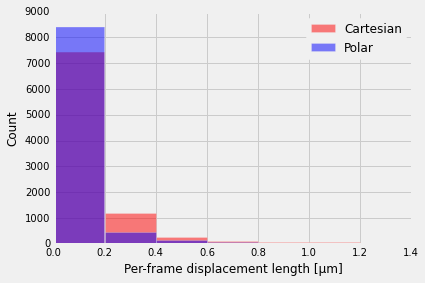

In [10]:
ax1 = totdf.Cartesian_Displacement.hist(bins=np.arange(0,1.4,0.2),color='red',label = 'Cartesian', alpha=0.5)
ax1.set_yscale('linear')
ax1.set_ylabel('Count')
ax1.set_xlabel('Per-frame displacement length [µm]')
totdf.Polar_Displacement.hist(bins=np.arange(0,1.4,0.2),color='blue',  label = 'Polar', alpha=0.5, ax=ax1)
ax1.legend(loc='upper right')
#ax1.grid(False)
plt.tight_layout()
#plt.savefig(directory+'/Graphs/Total_Analysis/DisplacementHistogram.pdf')

In [11]:
totdf.Polar_Displacement.std()/totdf.Polar_Displacement.mean()

1.5606586289619688

In [12]:
totdf[totdf.Polar_Displacement > 0.8].count()

Unnamed: 0                63
                          63
Label                     63
Area                      63
XM                        63
YM                        63
Angle                     63
Foci X                    63
Foci Y                    63
Cartesian_Displacement    63
Polar_Displacement        63
Fluorescence_Intensity    63
Generation                63
rcostheta                 63
dtype: int64

In [13]:
print('Total µNS foci: '+ str(int(len(totdf.Polar_Displacement)/399)))

Total µNS foci: 23


/Users/kaito/.pyenv/versions/anaconda3-2.0.1/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


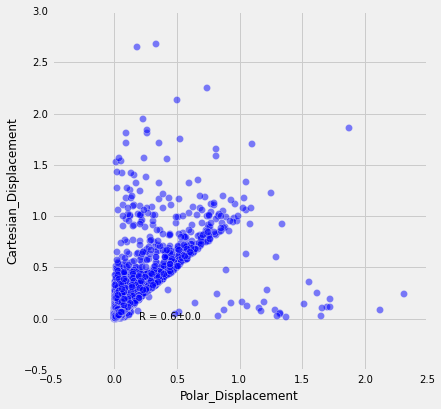

In [14]:
ax = totdf.plot(kind='scatter', x = 'Polar_Displacement', y = 'Cartesian_Displacement',alpha=0.5,s =50,color = 'blue', figsize=(6,6))
ax.set_yscale('linear')
corr = totdf.Cartesian_Displacement.corr(totdf.Polar_Displacement)
corrstder = ((1-(totdf.Cartesian_Displacement.corr(totdf.Polar_Displacement))**2)/len(totdf))**(0.5)
ax.annotate('R = %.1f'%corr + '±%.1f'%corrstder, (0.2, 0))